In [27]:
import warnings
import pandas as pd
import numpy as np

warnings. filterwarnings("ignore")

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print('Size of heart failure clinical dataframe is :', df.shape)

df.head()

Size of heart failure clinical dataframe is : (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [28]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [30]:
# select columns to cluster

cluster_columns = ['age', 'sex', 'serum_sodium', 'platelets', 'smoking']

df = df[cluster_columns]

In [31]:
df.head()

,age,sex,serum_sodium,platelets,smoking
0,75.0,1,130,265000.00,0
1,55.0,1,136,263358.03,0
2,65.0,1,129,162000.00,1
3,50.0,1,137,210000.00,0
4,65.0,0,116,327000.00,0


In [32]:
from sklearn.preprocessing import StandardScaler

# define numerical and categorical columns
numerical_columns = ['age', 'serum_sodium', 'platelets']
categorical_columns = ['sex', 'smoking']

scaler = StandardScaler()

# create a copy of our data to be scaled
df_scale = df.copy()

# standard scale numerical features
for c in numerical_columns:
    df_scale[c] = scaler.fit_transform(df[[c]])

In [33]:
df_scale.head()

,age,sex,serum_sodium,platelets,smoking
0,1.192945,1,-1.504036,1.681648e-02,0
1,-0.491279,1,-0.141976,7.535660e-09,0
2,0.350833,1,-1.731046,-1.038073e+00,1
3,-0.912335,1,0.085034,-5.464741e-01,0
4,0.350833,0,-4.682176,6.517986e-01,0


In [34]:
df_scale.shape

(299, 5)

In [35]:
df_out = df_scale[(df_scale['age'].abs()<=3) & (df_scale['platelets'].abs()<=3) & (df_scale['serum_sodium'].abs()<=3)]
df_out.shape

(293, 5)

## Finding Optimal Number of Clusters

In [36]:
from kmodes.kprototypes import KPrototypes

categorical_indexes = []

for c in categorical_columns:
    categorical_indexes.append(df.columns.get_loc(c))

categorical_indexes

[1, 4]

### The Elbow Method

Text(0, 0.5, 'Cost')

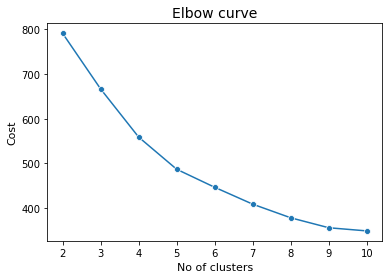

In [37]:
import seaborn as sns

num_clusters = list(range(2, 11))

cost_values = []

# calculate cost values for each number of clusters (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cost_values.append(kproto.cost_)

# plot cost against number of clusters
ax = sns.lineplot(x=num_clusters, y=cost_values, marker="o")
ax.set_title('Elbow curve', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Cost', fontsize=11)

### The Average Silhouette Method

Text(0, 0.5, 'score')

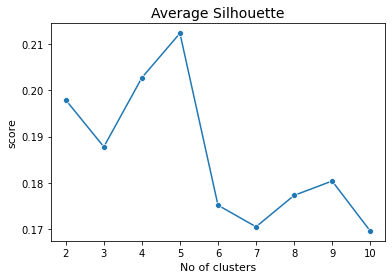

In [38]:
from sklearn.metrics import silhouette_score

silhouette_avg = []

# calculate average silhouette score for each number of cluster (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(df_scale, cluster_labels))

# plot average silhouette score against number of clusters
ax = sns.lineplot(x=num_clusters, y=silhouette_avg, marker="o")
ax.set_title('Average Silhouette', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('score', fontsize=11)

Text(0, 0.5, 'score')

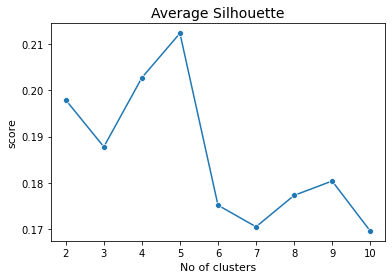

In [39]:
#### The Average Silhouette Method

from sklearn.metrics import silhouette_score

silhouette_avg = []

# calculate average silhouette score for each number of cluster (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(df_scale, cluster_labels))

# plot average silhouette score against number of clusters
ax = sns.lineplot(x=num_clusters, y=silhouette_avg, marker="o")
ax.set_title('Average Silhouette', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('score', fontsize=11)

Dari dua plot di atas, menunjukkan bahwa **5** cluster tampaknya masuk akal untuk data tersebut. Kualitas cluster cukup buruk dengan skor siluet **rendah**.

### Clustering the Data

In [40]:
# we set the number of clusters to 5
kproto = KPrototypes(n_clusters= 5, init='Huang', n_init = 25, random_state=42)
kproto.fit_predict(df_scale, categorical= categorical_indexes)

# store cluster labels
cluster_labels = kproto.labels_

# add clusters to dataframe
df["cluster"] = cluster_labels

# check if clusters have been added to the dataframe
df.head()

,age,sex,serum_sodium,platelets,smoking,cluster
0,75.0,1,130,265000.00,0,0
1,55.0,1,136,263358.03,0,3
2,65.0,1,129,162000.00,1,1
3,50.0,1,137,210000.00,0,3
4,65.0,0,116,327000.00,0,1


### Cluster Exploration

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_df = pca.fit_transform(df_scale)

In [42]:
import plotly.graph_objects as go


fig = go.Figure(
    go.Scatter3d(mode='markers',
                 x = pca_df[:, 0],
                 y = pca_df[:, 1],
                 z = pca_df[:, 2],
                 marker=dict(size = 5, color = df['cluster'], colorscale = 'spectral')
                )
)
    
fig.show()

In [43]:
# size of each cluster

df["cluster"].value_counts()

3    100
0     80
2     56
4     37
1     26
Name: cluster, dtype: int64

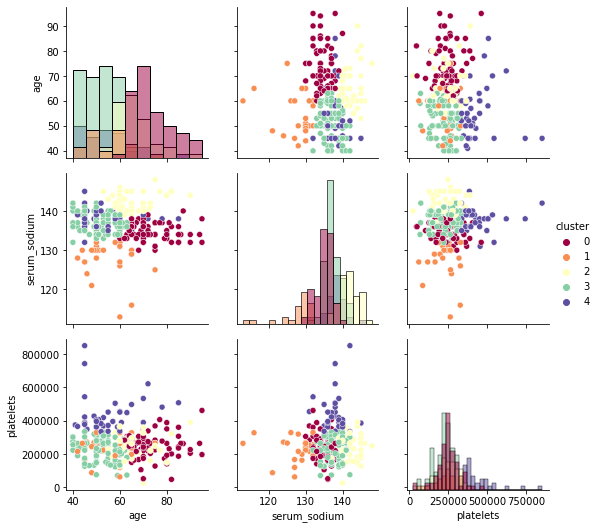

In [44]:
# numerical data exploration
g = sns.PairGrid(df[["age", "serum_sodium", "platelets", "cluster"]], hue = "cluster", palette = 'Spectral')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

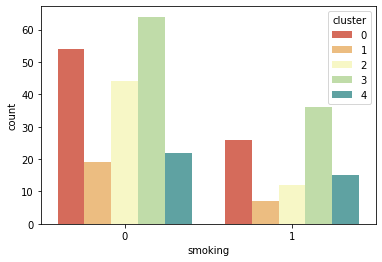

In [45]:
ax = sns.countplot(data = df, x="smoking", hue = "cluster", palette = 'Spectral' )

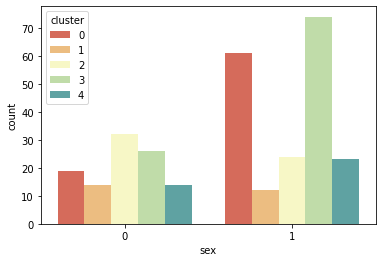

In [46]:
ax = sns.countplot(data = df, x="sex", hue = "cluster", palette = 'Spectral' )

##### Cluster Statistics

In [47]:
df[df["cluster"] == 2].describe()

,age,sex,serum_sodium,platelets,smoking,cluster
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,65.535714,0.428571,141.553571,246056.680179,0.214286,2.0
std,7.198394,0.499350,2.522046,68026.269486,0.414039,0.0
min,53.000000,0.000000,137.000000,25100.000000,0.000000,2.0
25%,60.000000,0.000000,140.000000,200750.000000,0.000000,2.0
50%,65.000000,0.000000,141.000000,250500.000000,0.000000,2.0
75%,70.000000,1.000000,144.000000,294250.000000,0.000000,2.0
max,90.000000,1.000000,148.000000,390000.000000,1.000000,2.0
